In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [5]:
df = pd.read_csv("all-data.csv", names=["label", "text"], encoding="ISO-8859-1")
print(df.head())
print(df.info())

      label                                               text
0   neutral  According to Gran , the company has no plans t...
1   neutral  Technopolis plans to develop in stages an area...
2  negative  The international electronic industry company ...
3  positive  With the new production plant the company woul...
4  positive  According to the company 's updated strategy f...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   4846 non-null   object
 1   text    4846 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB
None


In [6]:
df['text'] = df['text'].str.lower()            # 소문자화
df['text'] = df['text'].str.replace('[^a-z ]', '', regex=True)  # 특수문자 제거


In [7]:
X = df['text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [9]:
model = LogisticRegression()
model.fit(X_train_vec, y_train)

pred = model.predict(X_test_vec)
print(classification_report(y_test, pred))


              precision    recall  f1-score   support

    negative       0.81      0.43      0.56       110
     neutral       0.74      0.96      0.83       571
    positive       0.80      0.47      0.59       289

    accuracy                           0.75       970
   macro avg       0.78      0.62      0.66       970
weighted avg       0.76      0.75      0.73       970



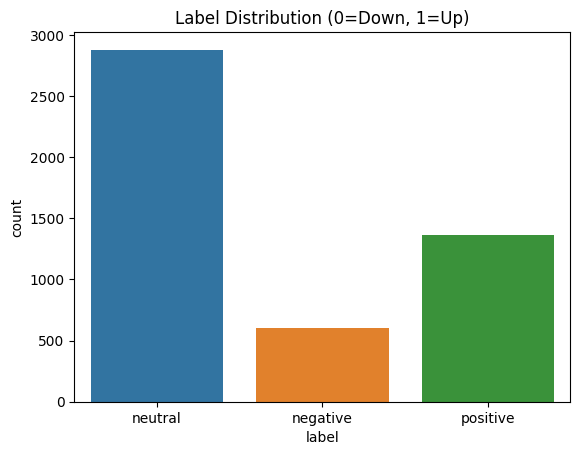

In [15]:
sns.countplot(x='label', data=df)
plt.title("Label Distribution (0=Down, 1=Up)")
plt.show()


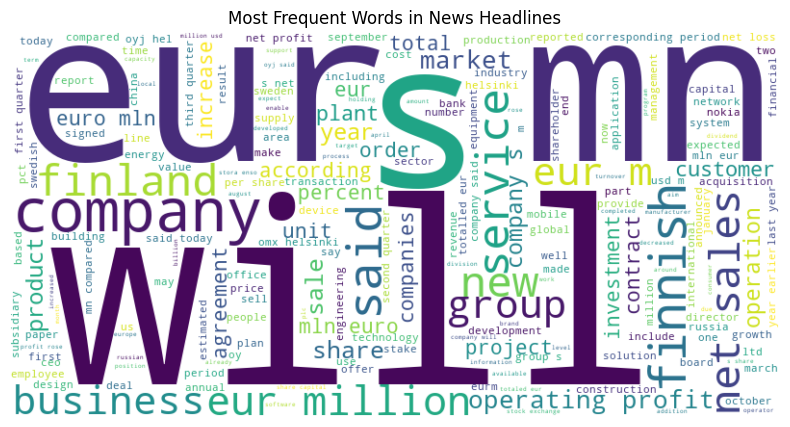

In [13]:
all_text = ' '.join(df['text'])

wc = WordCloud(width=800, height=400, background_color='white').generate(all_text)
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequent Words in News Headlines")
plt.show()
